<a href="https://colab.research.google.com/github/Pai-Chai-University/colab/blob/master/Car_License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,300 kB/s)
debconf: unable to initi

In [0]:
import cv2
import imutils
import numpy as np
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow

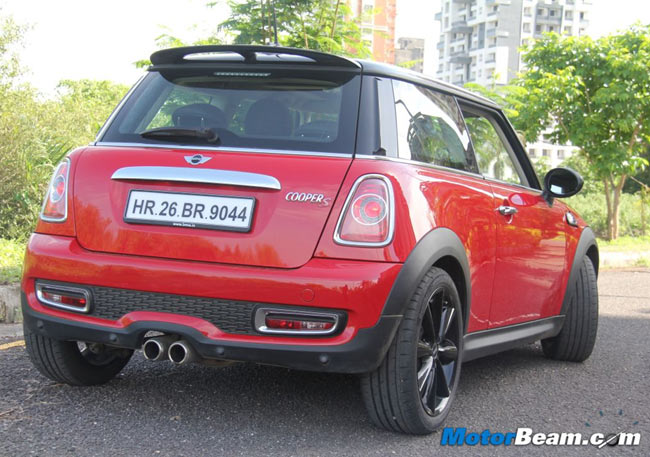

In [3]:
img = cv2.imread('car.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img)

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

In [0]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [0]:
for c in cnts:
 # approximate the contour
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
 # if our approximated contour has four points, then
 # we can assume that we have found our screen
 if len(approx) == 4:
  screenCnt = approx
  break


In [0]:
if screenCnt is None:
 detected = 0
 print("No contour detected")
else:
 detected = 1

if detected == 1:
 cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)

In [0]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

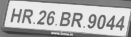

In [9]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
cv2_imshow(Cropped)

In [10]:
text = pytesseract.image_to_string(Cropped)
print("Detected Number is:",text)

Detected Number is: PHR 26.BR.9044


In [0]:
cv2.waitKey(0)
cv2.destroyAllWindows()